# First Experiments
* 3 base models
* Std_Norm
* No data augmentatition
* MSE

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ResNet-Autoencoder" data-toc-modified-id="ResNet-Autoencoder-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ResNet Autoencoder</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Cuantitative" data-toc-modified-id="Cuantitative-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Cuantitative</a></span><ul class="toc-item"><li><span><a href="#Validation-set" data-toc-modified-id="Validation-set-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Validation set</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Test set</a></span></li></ul></li><li><span><a href="#Cualitative-(How-it-reconstruct)" data-toc-modified-id="Cualitative-(How-it-reconstruct)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Cualitative (How it reconstruct)</a></span><ul class="toc-item"><li><span><a href="#Validation-set" data-toc-modified-id="Validation-set-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Validation set</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Test set</a></span></li></ul></li></ul></li></ul></li></ul></div>

https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

In [1]:
import os
import glob
import tensorflow as tf
import random
from my_tf_data_loader_optimized import tf_data_png_loader
import matplotlib.pyplot as plt

GLOBAL_BATCH_SIZE = 16
train_percentage = 0.85
INPUT_SHAPE = (128,128)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## ResNet Autoencoder

### Training

Training is made in scripts:

* **`./residual_cae.py`** (architecture)
* **`./residual_cae_experiment.py`** (experiment configuration and running)
* **`./results/res_cae_e100_b64_is128/`** (folder with results: hisotry.csv, model.h5 and aarch_picture.png)

### Evaluation
#### Cuantitative

##### Validation set

##### Test set

In [2]:
TEST_img_PATH = '..'+os.path.sep+'IXI-T1'+os.path.sep+'PNG'+os.path.sep+'test_folder'+os.path.sep+'test'
test_img_files = glob.glob(TEST_img_PATH+os.path.sep+'*.png')
params = {'batch_size': GLOBAL_BATCH_SIZE,
          'cache':False,
          'shuffle_buffer_size':1000,
          'resize':INPUT_SHAPE
         }
test_ds = tf_data_png_loader(test_img_files,
                             **params,
                             train=False
                            ).get_tf_ds_generator()


In [24]:
from tensorflow.keras.layers import Activation

#### Cualitative (How it reconstruct)

In [20]:
def plot_batch(cae, batch):
    for i in range(batch[0].shape[0]):
        if i%2==0:
            plt.figure(figsize=(15,5))
            idx=1
        else:
            idx=3
        plt.subplot(1,4,idx)
        tit = 'Original\nm:{:.4f}\nM:{:.4f}\nMean:{:.4f}'.format(tf.math.reduce_min(batch[1][i]).numpy(),
                                                      tf.math.reduce_max(batch[1][i]).numpy(),
                                                      tf.math.reduce_mean(batch[1][i]).numpy())
        plt.title(tit)
        plt.imshow(batch[1][i], cmap='gray')

        plt.subplot(1,4,idx+1)
        decode = cae.predict(tf.expand_dims(batch[0][i], axis=0))[0]
        tit = 'Output\nm:{:.4f}\nM:{:.4f}\nMean{:.4f}'.format(tf.math.reduce_min(decode).numpy(),
                                                      tf.math.reduce_max(decode).numpy(),
                                                      tf.math.reduce_mean(decode).numpy())
        plt.title(tit)
        plt.imshow(decode, cmap='gray')

        if not i%2==0:
            plt.show()

In [26]:
def plot_noisy_batch(cae,batch, ndev=0.15):
    for i in range(batch[0].shape[0]):
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)
        tit = 'Original\nm:{:.4f}\nM:{:.4f}\nMean:{:.4f}'.format(tf.math.reduce_min(batch[1][i]).numpy(),
                                                      tf.math.reduce_max(batch[1][i]).numpy(),
                                                      tf.math.reduce_mean(batch[1][i]).numpy())
        plt.title(tit)
        plt.imshow(batch[1][i], cmap='gray')

        plt.subplot(1,3,2)
        noise = tf.random.normal(shape=tf.shape(batch[1][i]), mean=0, stddev=ndev, dtype=tf.float32)
        noise_img = tf.add(batch[1][i], noise)
        tit = 'Input\nm:{:.4f}\nM:{:.4f}\nMean{:.4f}'.format(tf.math.reduce_min(noise_img).numpy(),
                                                      tf.math.reduce_max(noise_img).numpy(),
                                                      tf.math.reduce_mean(noise_img).numpy())
        plt.title(tit)
        plt.imshow(noise_img, cmap='gray')      

        plt.subplot(1,3,3)
        decode = cae.predict(tf.expand_dims(noise_img, axis=0))[0]
        tit = 'Output\nm:{:.4f}\nM:{:.4f}\nMean{:.4f}'.format(tf.math.reduce_min(decode).numpy(),
                                                      tf.math.reduce_max(decode).numpy(),
                                                      tf.math.reduce_mean(decode).numpy())
        plt.title(tit)
        plt.imshow(decode, cmap='gray')

        if not i%2==0:
            plt.show()

##### Validation set
##### Test set

In [17]:
elem = next(iter(test_ds))
elem[0].shape, elem[1].shape

(TensorShape([16, 128, 128, 1]), TensorShape([16, 128, 128, 1]))

In [18]:
small_res_cae_original_MinMax = tf.keras.models.load_model('results/small_res_cae_original_MinMax_e100_b32_is128_T17_11_20__17_57/small_res_cae_original_MinMax_model.h5')

In [19]:
plot_batch(small_res_cae_original_MinMax, elem)

NameError: name 'plot_batch' is not defined

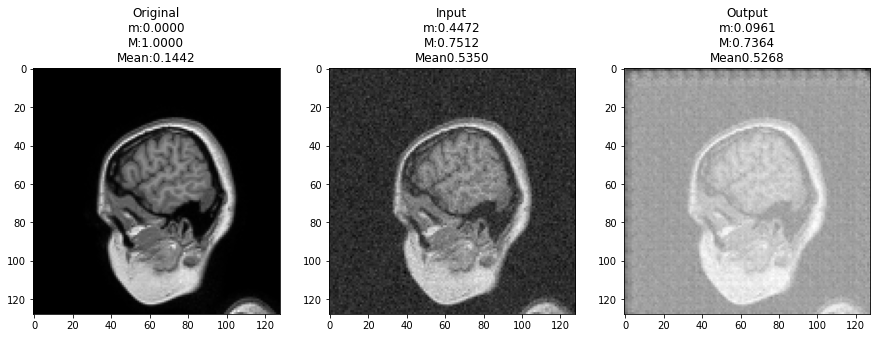

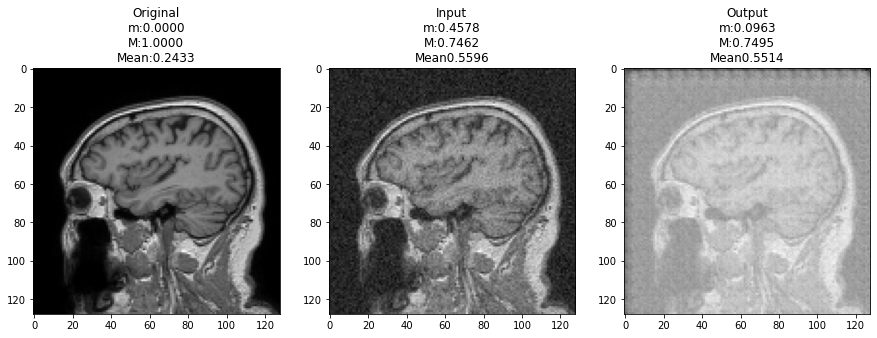

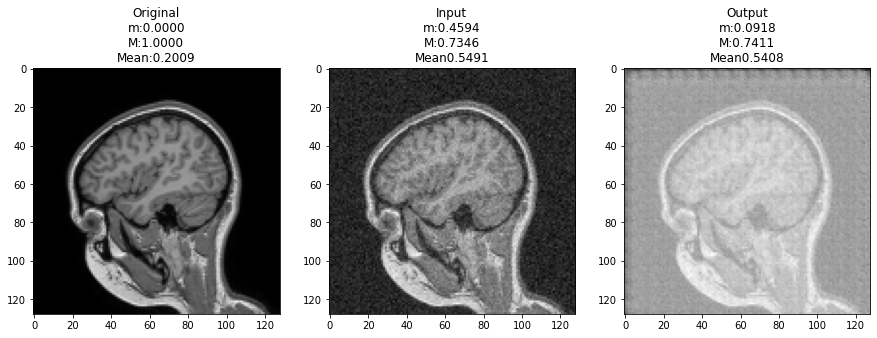

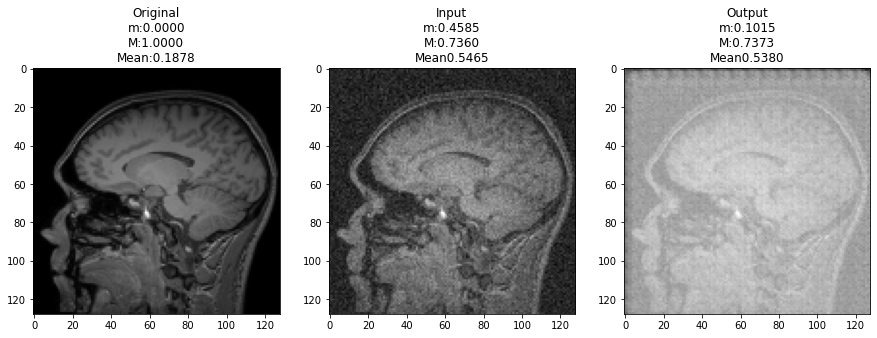

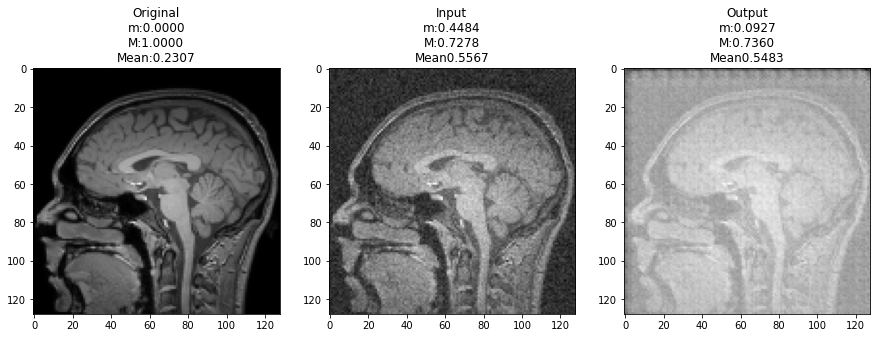

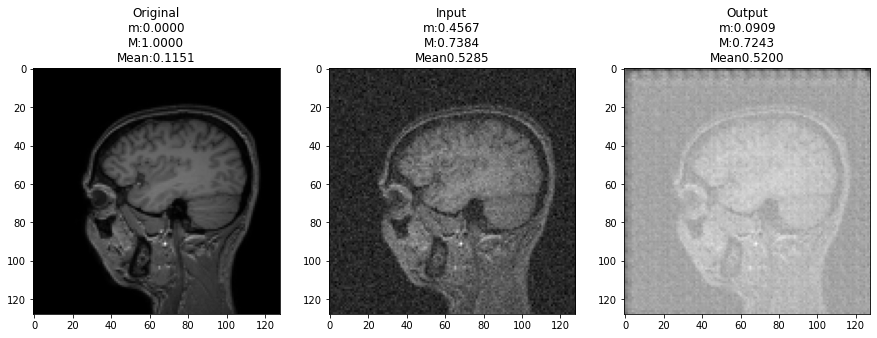

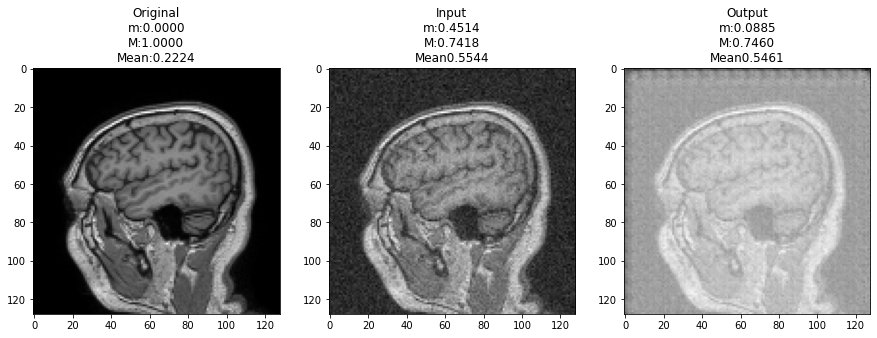

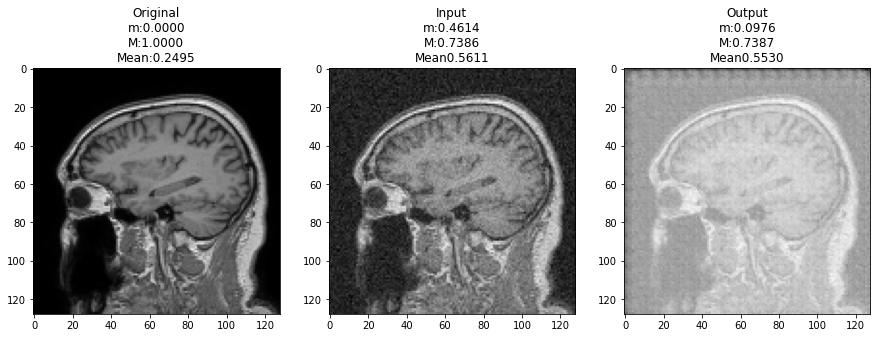

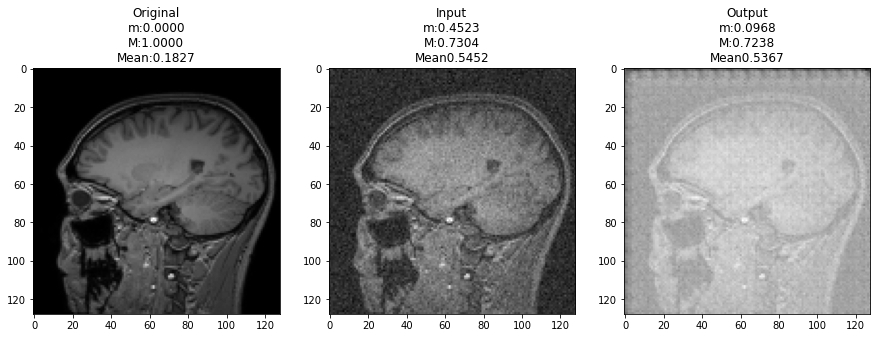

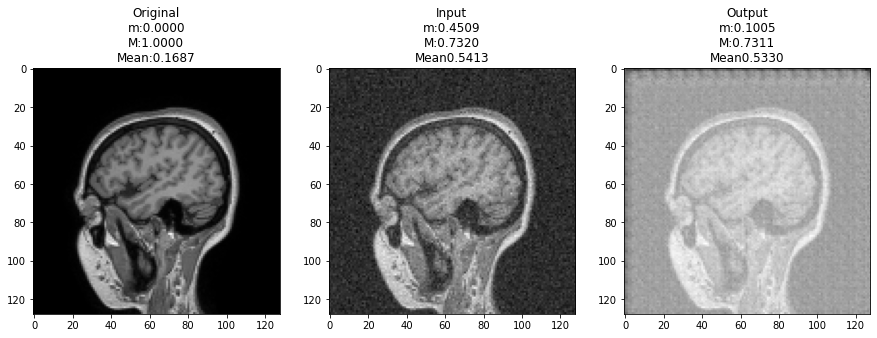

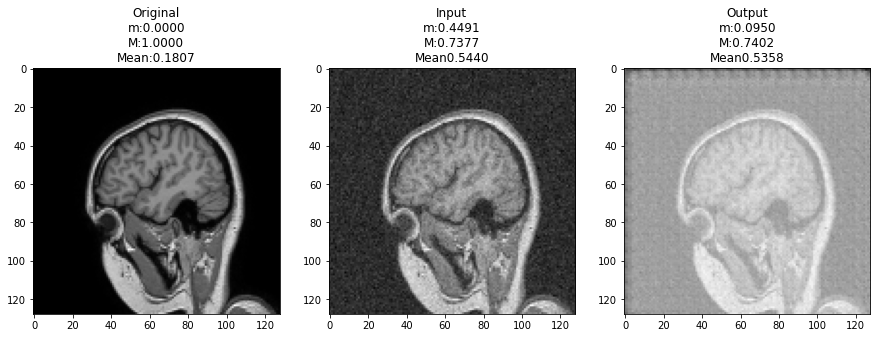

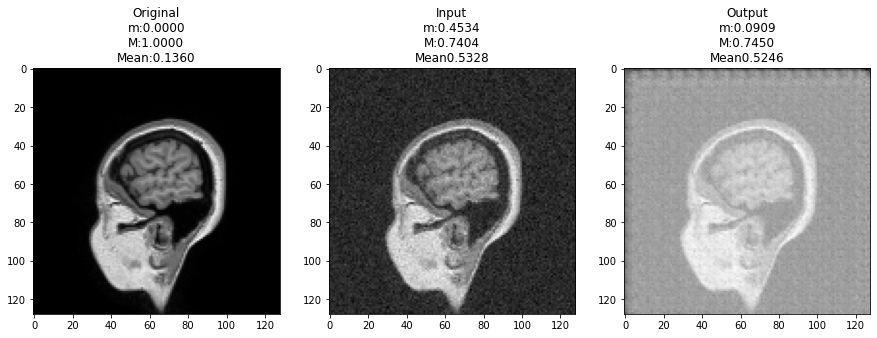

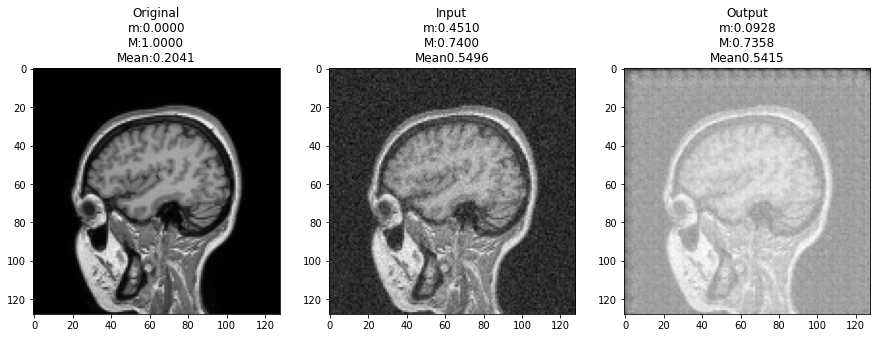

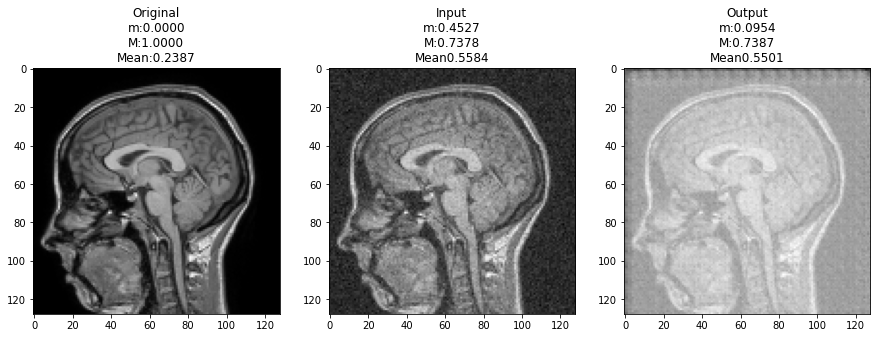

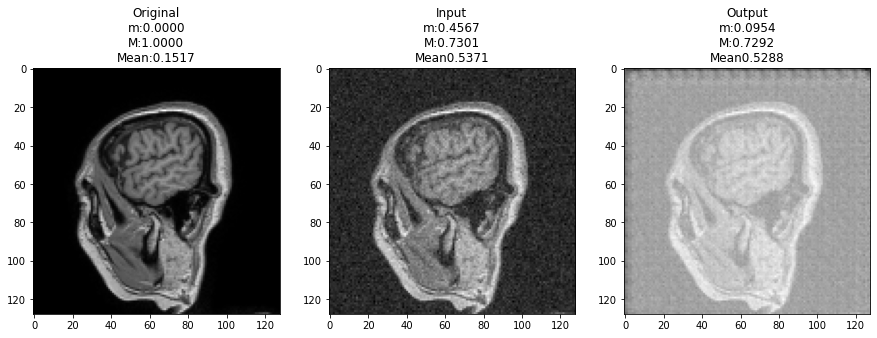

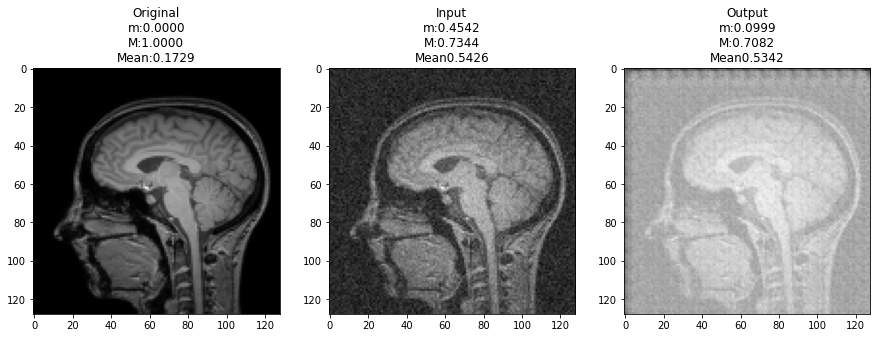

In [27]:
plot_noisy_batch(small_res_cae_original_MinMax, elem, 0.05)

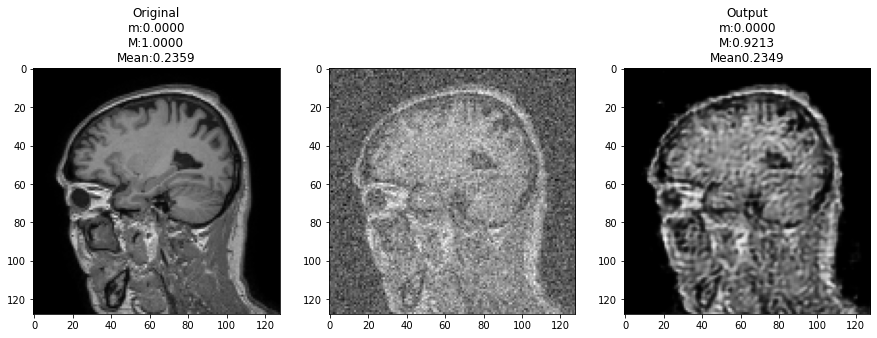

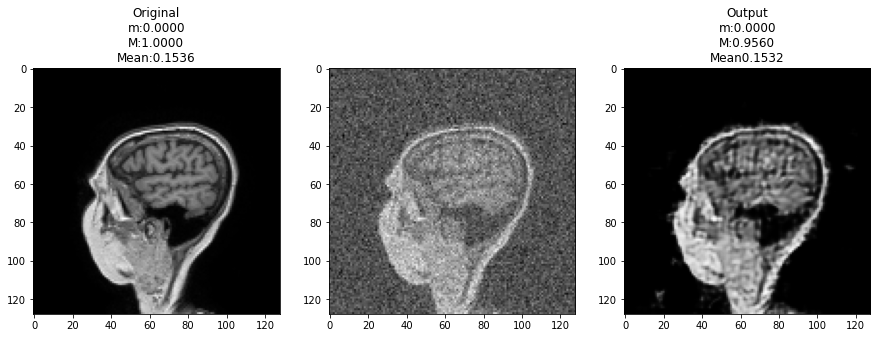

In [32]:
1e-4

0.0001